In [2]:
import course.images

# Vad är en avbildning?
En avbildning i tekniska sammanhang är vad man i andra sammanhang kanske skulle kallat en bild. En avbildning utgår ifrån ett motiv, en *referent*, och försöker återskapa denna i ett annat medium. En målning av en vas är alltså en avbildning på duk av referenten vas. Likaledes är ett fotografi en digital avbildning av någon fysisk referent. En digitalisering, såsom OCR eller inskanning av dokument är på samma sätt avbildningar. Ett annat exempel är mikroskopi, som avbildar mycket små motiv genom optik.

På engelska kallas handlingen att avbilda vanligtvis *imaging*.

## Vad är en bild?
Inom humanistiska och kulturvetenskapliga discipliner är detta en fråga som tvivelsutan skulle leda till kontrovers och diskussion. En bild kan syfta på ett fotografi, en tavla, en ritning, en mental bild och så vidare. Inom bildanalys finns det dock ingen tveksamhet: *En bild är en digital avbildning i två dimensioner*. På engelska används vanligen ordet *image* med samma betydelse. Detta omfattar alla avbildningar som i slutändan är digitala - fotografier, animering, elektronmikroskopi med flera.

Det kan tyckas restriktivt att begränsa betydelsen av bild, men orsaken är utilitaristisk - digitala bilder i 2D kan representeras och manipuleras med mycket specialiserade och effektiva digitala metoder.

## När datorn skall se...
Liksom när datorn skulle läsa är det viktigt att inse att datorer inte *ser*. De kan inte urskilja motiv i en bild, och om de kan göra det har motiven i sig ingen mening. De saknar den kontext och tolkningsförmåga människor har utvecklat. För en dator är en bild endast är en samling *pixlar*, små kvadratiska regioner med en viss färg. Detta gäller oavsett motiv eller avbildningsmetod. 

### Pixlar och färgrymder
Som påpekat i avsnittet om text måste datorer arbeta i siffror. Till skillnad från text så finns det ett par standarder för representationen av bilder numeriskt. En sådan är pixlar med en viss *färgrymd*.

Färgrymder är metoder för att numeriskt representera färg. Det finns flera standarder, och vi kommer endast att behandla vad som kallas RGB (*red*-*green*-*blue*) och gråskala. 

En gråskalepixel är en kvadratisk region som kan anta värden mellan 0 och 255. 0 betecknar vitt, och 255 betecknar svart. Ett värde på 100 ger en ljusgrå pixel, och 200 ger en mörkgrå pixel. Detta betyder att vi kan endast färglägga pixeln med 256 nyanser av grått. Detta kallas att färgen är "kvantiserad". 
<div>
<img src="media/mona_gray.png" width="500"/>
</div>

Det betyder att vi kan representera åtminstone en skala från svart till vitt med siffror. I likhet med fallet med vektormodeller i text kan pixlar kan ha en viss *dimensionalitet*. En gråskalebild har endast en dimension och kan endast representera en skala, och för att fånga fler nyanser i en bild måste vi utöka hur dimensionaliteten hos pixlarna. I RGB består varje pixel av tre överlagrade färger, en *vektor* av värden 0-255. En helt röd pixel har värdet (255, 0, 0), en grön (0, 255, 0) och en blå pixel har värdet (0, 0, 255). 

<div>
<img src="media/mona_colour.png" width="400"/>
</div>

Detta känner många redan till. Det är emellertid viktigt att förstå att en sådan representation av färger är nödvändig för att maskiner skall kunna bearbeta bilderna.

Enbart pixlar gör emellertid inte en bild. Vi måste arrangera dessa på ett lämpligtvis. Nedan är en längd med pixlar föreställande just Mona Lisa. 

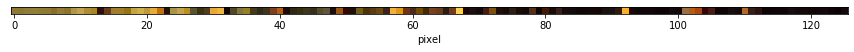

In [3]:
f, axes = course.images.mona_lisa_as_line(n=3)

För en dator är det entydigt en bild av Mona Lisa. Vi å andra sidan kan bara identifiera bilden efter att den arrangerats i ett rutnät. Den högraste bilden motsvarar alltså samma visualisering som ovan.

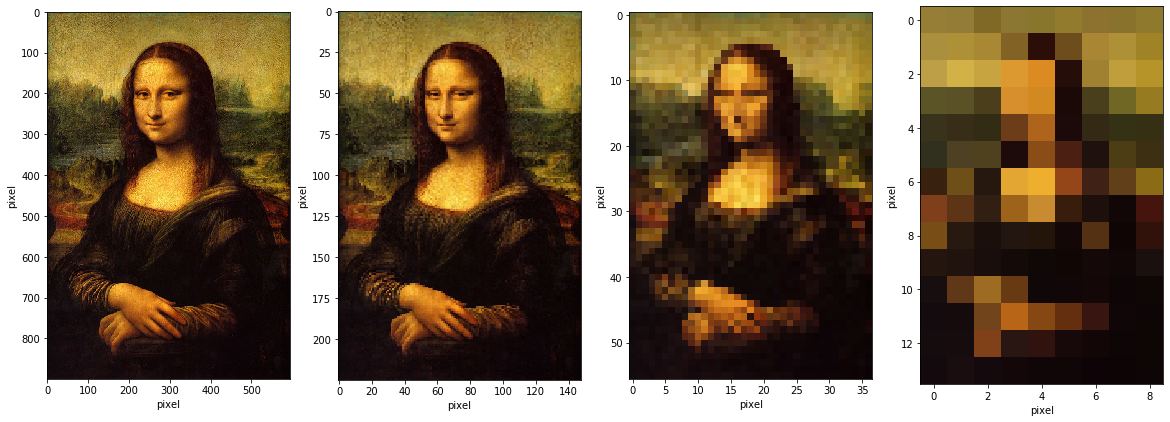

In [4]:
f, axes = course.images.mona_lisa_downscaled(n=4)

Observera att det är skillnad på *fysiska* och *virtuella* pixlar. I den sista bilden består Mona Lisa av endast 8 x 13 virtuella pixlar. Däremot består varje enskild virtuell pixel av de fysiska pixlar ni ser på er datorskärm. Antalet varierar som bekant från monitor till monitor, och är det som syftas på om er skärm är "1080p", "4k" eller "HD". Om er representation i virtuella pixlar är mer högupplöst än ni har fysiska pixlar på er skärm är alltså de fysiska pixlarna gränsen.

# Skalrymden och filtrering
Skalrymd (eng. *scale space*) symboliserar de olika skalor på vilken motiv i en bild existerar. Detta är ett abstrakt koncept de flesta är bekanta med i vardagen, om de någonsin använt Instagram eller liknande. När vi applicerar ett *smoothing*-filter eller liknande på en selfie, är vi intresserade av att ta bort defekter/brus på en liten skala - det rör sig om prickar, pigmentfläckar, acne eller liknande. Vad vi *inte* är intresserade av är att mjuka upp är stora egenskaper i bilden, som näsan, ögonen, munnen. 

Fläckar och ögon/näsa/mun existerar i olika skala i en selfie. En ännu större skala är själva huvudet eller bakgrunden. Uppmjukningsfilter finns alltså i olika storlek, ofta räknat i ungefär vilken pixelstorlek de mjukar upp, jämför nedan. I denna bild försvinner små detaljer i bilden som grässtrån redan vid 4 pixlar, vilket är ungefär den storlek de har i bilden. På samma sätt är endast stora konturer bevarade vid 50 pixels filtrering - bakgrundens hus är ungefär 25 pixlar stora och försvinner därför.

Det är ofta relevant att ha olika stora filter för att kunna ta bort brus eller detaljer på olika nivåer.

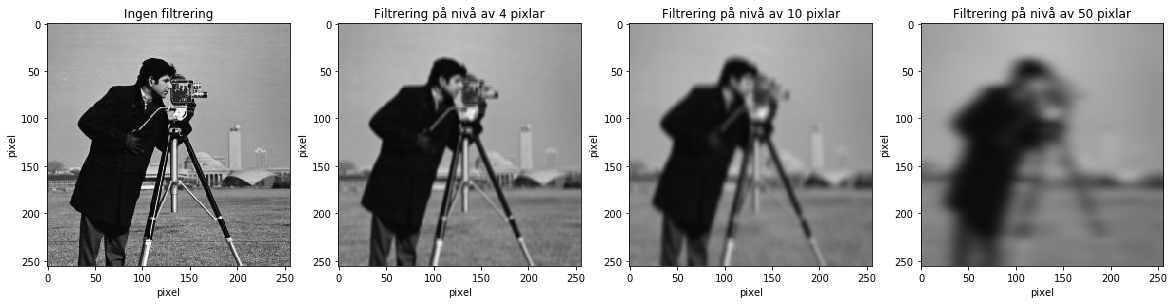

In [2]:
f, axes = course.images.cameraman_scale_space()

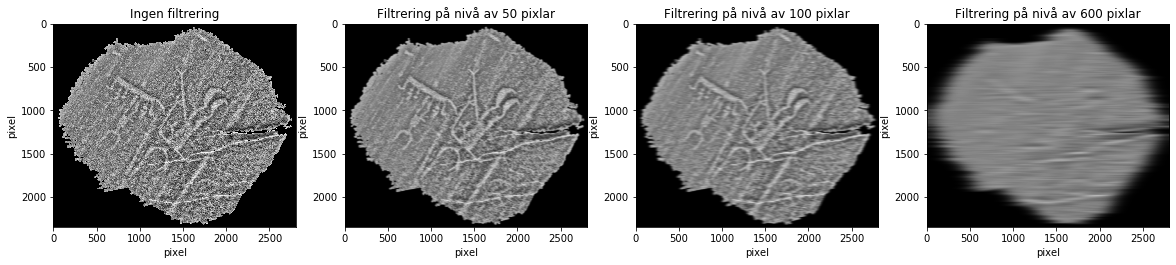

In [7]:
f, axes = course.images.figure_scale_space("media/carving.png", ks=[1, 51, 101, 601])

Skalrymden kan hjälpa oss att isolera detaljer på olika nivå i bilder. Ett enkelt system för att bevara endast små strukturer i hällen (som exempelvis hällristningen, men också skador och brus) är att använda en kraftig filtrering och sedan subtrahera denna som bakgrund! Resultatet blir då som nedan.

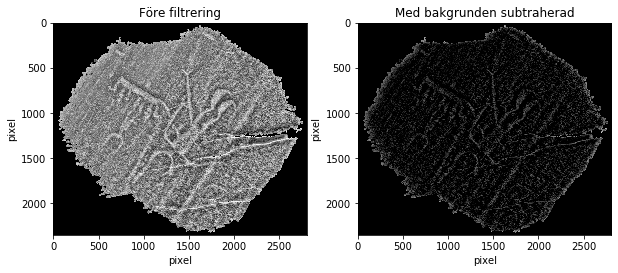

In [3]:
f, axes = course.images.remove_background("media/carving.png", level=501)

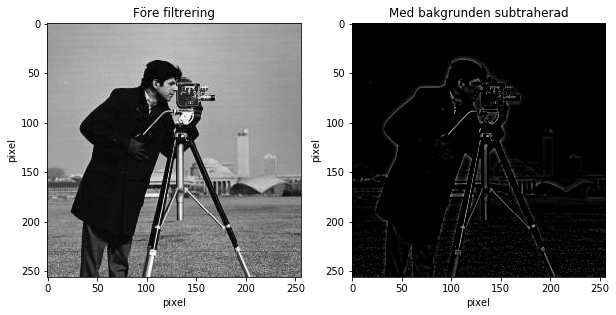

In [4]:
f, axes = course.images.remove_background("media/cameraman.jpg", level=11)

Det är helt och hållet bildernas numeriska representation som tillåter denna typ av enkel behandling. Eftersom pixlar med lika färg har lika värden, kan vi subtrahera dem, och således pixelvis modifiera bilden.

## Brus! Eller, "vad är en bild, part 2"
Bilder är på många sätt

## Tillämpningar
### Klassifikation
### Detektion
### Segmentering